# Time sequence primer using Pytorch

In [234]:
import torch
from torch.utils import data
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Time varying signal

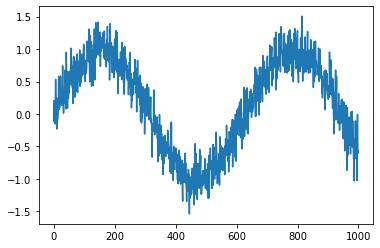

In [184]:
N = 1000
t = np.arange(N)
x = np.sin(0.01*t) + 0.2 * np.random.normal(size=N)
plt.plot(x)

$$y_t = data_t, x_t = data_{t-1}... data_{t-1-M}$$

## Define features & labels

- input is a history of points of size k: $x[0:k]$
- output is the point at time k+1 given k points: $x[k]$

In [185]:
M = 5
i = 1
# history of 10 for signal x: x[0:10]
print(i, i+M)
print(x[i:i + (M)])
print(i, i+(M+1))
print(x[i:i + (M+1)])
print(i+M)
print(x[i+M])

1 6
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403]
1 7
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403  0.53307748]
6
0.5330774770530665


In [186]:
X = []
y = []
for i in range(0, N-M):
    X.append(x[i:(i+M)])
    y.append(x[i+M])

In [192]:
print(X[0],y[0])
print(X[1],y[1])

[ 0.20247964 -0.11661362  0.19604669  0.16984733 -0.15508892] 0.15699402885720062
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403] 0.5330774770530665


In [200]:
tutu = torch.from_numpy(X[0])
print(tutu)
print(type(tutu))
len(X)

tensor([ 0.2025, -0.1166,  0.1960,  0.1698, -0.1551], dtype=torch.float64)
<class 'torch.Tensor'>


995

## train/test partition

In [207]:
test_size = int(len(ds) * 0.20)
train_size = int(len(ds) * 0.8)
print(test_size)
print(train_size)

199
796


In [215]:
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

## Create pytorch dataset

this will allow use to use pytorch dataloader class to define batches and potentially paralellize processing per batch

In [216]:
class TimeDataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, features, labels):
        'Initialization'
        self.labels = labels
        self.features = features
        self.dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
        
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.features)

  def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        X = torch.from_numpy(self.features[index])
        # expecting numpy array not float
        y = torch.from_numpy(np.array(self.labels[index]))
        sample = {'X': X, 'y':y }
        return sample

In [217]:
ds = TimeDataset(X,y)

In [218]:
print(ds[0])

{'X': tensor([ 0.2025, -0.1166,  0.1960,  0.1698, -0.1551], dtype=torch.float64), 'y': tensor(0.1570, dtype=torch.float64)}


In [235]:
train_ds = TimeDataset(X_train, y_train)
test_ds = TimeDataset(X_test, y_test)

In [236]:
print(test_ds[0])

{'X': tensor([1.0710, 1.1669, 0.9224, 1.2145, 1.2816], dtype=torch.float64), 'y': tensor(0.6334, dtype=torch.float64)}


## Pytorch dataloader

In [242]:
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 1}

In [240]:
train_dl = data.DataLoader(train_ds, **params)
test_dl = data.DataLoader(test_ds, **params)

In [239]:
type(test_dl)

torch.utils.data.dataloader.DataLoader

In [243]:
for i, batch in enumerate(test_dl):
    print(batch['y'])

tensor([0.6334, 0.7057, 0.4882, 0.8916, 0.6893, 0.9930, 0.9350, 0.9575, 0.6522,
        1.1714, 0.9996, 0.7385, 0.9610, 1.5053, 0.8910, 0.7878, 0.5056, 0.9938,
        0.8523, 0.6260, 0.6645, 0.9252, 0.7337, 1.1486, 1.1858, 0.6544, 0.7366,
        0.6469, 0.9560, 0.6884, 0.9186, 1.0506, 1.2718, 0.7057, 0.9691, 0.6298,
        0.9763, 0.9824, 0.9054, 0.6474, 0.9642, 0.6363, 1.1438, 1.1311, 1.0452,
        0.9463, 0.7153, 0.9894, 0.8138, 0.8223, 0.9468, 0.4074, 0.9262, 0.4953,
        1.1136, 0.6233, 0.5752, 1.0444, 1.1212, 0.8635, 0.7356, 0.8113, 0.7406,
        0.7319], dtype=torch.float64)
tensor([ 6.0146e-01,  7.0996e-01,  6.5055e-01,  6.6337e-01,  1.0156e+00,
         5.8858e-01,  5.0252e-01,  8.0628e-01,  7.8919e-01,  9.9717e-01,
         5.5548e-01,  7.3197e-01,  7.4661e-01,  6.8224e-01,  5.4447e-01,
         3.1418e-01,  5.8170e-01,  2.4736e-01,  4.4108e-01,  5.2195e-01,
         4.3585e-01,  4.7535e-01,  4.2197e-01,  6.6000e-01,  4.3769e-01,
         6.7713e-02,  6.6988e-01,  3.